In [1]:
# from pylbm import lbm_t as lbm
import matplotlib.pyplot as plt
import torch

/home/joe/miniconda3/envs/graph/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
import lbm_t as lbm
x_dim, y_dim = 100, 80
epochs = 100
top_vel = 1
omega = 1

In [35]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

r_xy = lbm.density_init(x_dim=x_dim, y_dim=y_dim, r_mean=1.0, eps=0.0)
u_axy = lbm.local_avg_velocity_init(x_dim=x_dim, y_dim=y_dim, u_mean=0.0, eps=0.0)
f_cxy = lbm.f_eq(u_axy=u_axy, r_xy=r_xy)

velocities = []
for t in range(epochs):
    velocities.append(u_axy)
    f_cxy = lbm.stream(f_cxy=f_cxy)
    f_cxy = lbm.apply_bottom_wall(f_cxy=f_cxy)
    f_cxy = lbm.apply_sliding_top_wall_simple(f_cxy=f_cxy, velocity=top_vel)
    f_cxy, u_axy = lbm.collision(f_cxy=f_cxy, omega=omega)


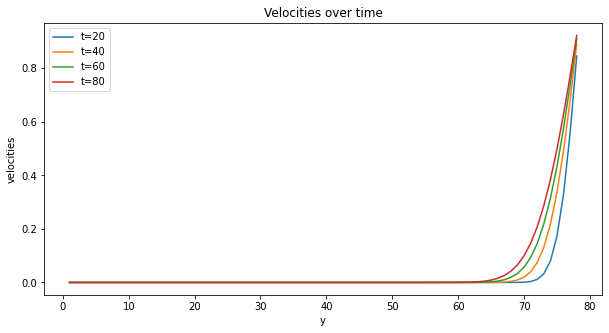

In [30]:
# Plot all velocitities along y
fig = plt.figure(figsize=(10,5))
ax = fig.subplots()
ax.set_title("Velocities over time")
num_plots = 5
for i in range(int(len(velocities)/num_plots), len(velocities), int(len(velocities)/num_plots)):
    # print(vel_clean)
    v=velocities[i]
    ax.plot(torch.arange(y_dim-2)+1, v[0,0,1:-1], label="t={}".format(i))
ax.set_ylabel("velocities")
ax.set_xlabel("y")
# ax.set_xticks(np.arange(int(y_dim/10)+1)*10)
ax.legend()
plt.show()
plt.close()

In [8]:
velocities[0].type()

'torch.FloatTensor'

In [9]:
import numpy as np

In [24]:
n = np.array(0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001, dtype=np.float64)
print(n)
a = torch.tensor(0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001, dtype=torch.float64)
print(a)
b = torch.tensor(0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001, dtype=torch.float64)
a + b

1e-109
tensor(1.0000e-109, dtype=torch.float64)


tensor(2.0000e-109, dtype=torch.float64)

In [36]:
print(velocities[0])

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], dtype=torch.float64)
